<a href="https://colab.research.google.com/github/RafaelCaballero/Julio24/blob/main/code/22MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introducción a la ciencia de datos con Python
### Rafa Caballero

## Aprendizaje automático en Python (I) - Rafael Caballero

## Multilayer Perceptron

In [ ]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

# Load data from https://www.openml.org/d/554
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)
X = X / 255.0 # valores entre 0 y 1


a,b = X.shape
a,b

(70000, 784)

In [ ]:
import pandas as pd
pd.value_counts(y)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

Mostramos un dígito al azar

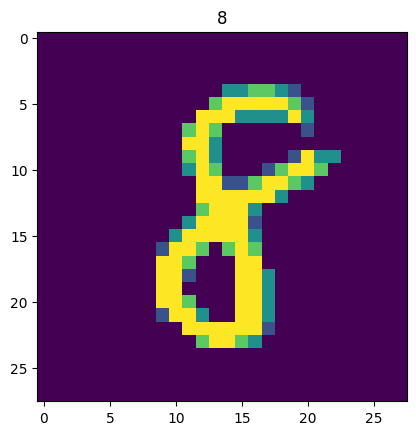

In [ ]:
import random

p  = random.randint(0,a)
plt.imshow(X[p].reshape(28,28))
plt.title(y[p])
plt.show()

Aplicamos un perceptrón de una sola capa con 60 celulas

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(60,),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.25,
)

mlp.fit(X_train, y_train)

print("Training set score: ",  mlp.score(X_train, y_train))
print("Test set score: ",  mlp.score(X_test, y_test))


Iteration 1, loss = 0.42139196
Iteration 2, loss = 0.17166282
Iteration 3, loss = 0.12394311
Iteration 4, loss = 0.09444770
Iteration 5, loss = 0.07559358
Iteration 6, loss = 0.06126929
Iteration 7, loss = 0.04876525
Iteration 8, loss = 0.03968531
Iteration 9, loss = 0.02932676
Iteration 10, loss = 0.02133327
Iteration 11, loss = 0.01778153
Iteration 12, loss = 0.01574767
Iteration 13, loss = 0.00944468
Iteration 14, loss = 0.00574016
Iteration 15, loss = 0.00357786
Iteration 16, loss = 0.00248450
Iteration 17, loss = 0.00225842
Iteration 18, loss = 0.00169201
Iteration 19, loss = 0.00147455
Iteration 20, loss = 0.00139295
Iteration 21, loss = 0.00132305
Iteration 22, loss = 0.00123449
Iteration 23, loss = 0.00117360
Iteration 24, loss = 0.00112034
Iteration 25, loss = 0.00106820
Iteration 26, loss = 0.00104170
Iteration 27, loss = 0.00099454
Iteration 28, loss = 0.00096471
Iteration 29, loss = 0.00093429
Iteration 30, loss = 0.00090730
Training loss did not improve more than tol=0.000

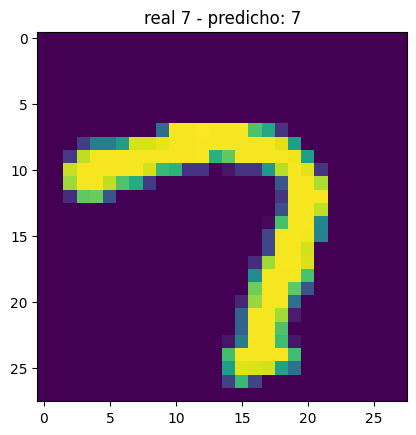

In [ ]:
i = random.randint(0,len(X_test)-1)
plt.imshow(X_test[i].reshape(28,28))

p = mlp.predict([X_test[i]])
plt.title("real "+y_test[i]+" - predicho: "+p[0])
plt.show()
